# Инициализация

In [1]:
#!pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppnrc01m7
  JVM stdout: /tmp/tmppnrc01m7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppnrc01m7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_9ig9mc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


# Подготовка данных

In [3]:
# подключу гугл диск
#from google.colab import drive
#drive.mount('/content/drive')

#data_path = "drive/MyDrive/Colab Notebooks/Healthcare/train_data__df2catencode_ultimate.csv"
data_path = "train_data__df2catencode_ultimate.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df = df.drop('C1')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,5,50
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
23,3,3,2,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,35,50


In [5]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,int,real,real,real,int,real
mins,1.0,1.0,1.0,0.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,5.0,7.816040607143563
mean,18.31884071624619,2.625653973457944,1.908462557860556,3.284099259510483,45.27853145667289,32.87907996529925,32.78353585024367,32.736854319240436,31.985504242584113,50.26050156867248
maxs,32.0,4.0,3.0,32.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,105.0,112.9535469594144
sigma,8.633754885795051,0.8730604938237946,0.6628857004044931,1.7640613895592008,19.585263126066604,1.0316564756930529,4.116346744445846,1.7714040252455794,21.500751611391166,5.7697512884693944
zeros,0,0,0,22,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,2.0,55.0,31.985504242584113,31.985504242584113,31.985504242584113,5.0,50.0
1,2.0,2.0,3.0,2.0,55.0,18.492752121292057,31.985504242584113,31.985504242584113,45.0,50.0
2,10.0,2.0,3.0,2.0,55.0,31.985504242584113,38.49275212129206,38.49275212129206,35.0,50.0


In [6]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])
train

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
10,3,3,2,55,43.4928,29.4976,39.6232,35,50
26,1,3,2,55,30.8732,34.2464,28.4928,15,50
16,3,3,2,55,29.1095,30.3971,13.9952,5,67.0408
6,3,3,2,75,31.7464,27.3285,10.3971,5,51.3321
23,3,3,4,75,26.5441,21.7464,24.2464,5,58.4624


In [7]:
valid

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
9,3,3,2,55,26.6986,29.6232,23.9952,25,15.2916
32,2,3,2,75,24.7488,27.6986,39.1095,25,108.15
28,2,2,2,30,26.3971,25.8732,10.2836,15,8.66919
27,2,2,2,30,25.8732,24.6986,33.1659,25,97.4085
27,3,2,4,30,25.7762,24.726,21.1643,55,79.5203
10,2,2,2,30,25.499,23.5539,11.0896,5,27.6496
26,3,1,8,75,24.1324,27.0758,10.5821,25,56.0588
14,2,2,3,30,26.3493,30.7721,25.9979,15,21.7379
28,2,2,3,30,24.4994,26.5411,32.8493,25,44.154


In [8]:
unseen

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,5,50
23,3,3,2,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
22,2,3,2,55,31.7122,30.2836,31.9855,25,45.8617
6,3,3,2,75,40.6618,38.4928,11.7464,5,40.7673
16,3,3,2,75,24.2464,27.4532,37.4532,35,35.0383
26,3,2,2,30,24.4976,24.6651,33.5616,25,58.0027
26,1,2,2,45,26.5441,25.5373,32.7361,35,56.7333
26,2,2,3,30,24.1866,24.8116,15.9436,45,54.349
21,2,2,3,30,27.0548,26.9466,19.3493,55,46.7863


In [9]:
y = "Stay"
x = train.columns
x.remove(y)

# Тренировка модели

In [10]:
#aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
aml = H2OAutoML(max_models = 10, seed = 1)
#aml = H2OAutoML(max_runtime_secs = 1000)
aml.train(x = x, y = y, training_frame = df, validation_frame=valid)

AutoML progress: |
05:33:56.44: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [11]:
lb = aml.leaderboard

In [12]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230903_53355,15.307,234.305,11.0841,0.536166,234.305
StackedEnsemble_BestOfFamily_1_AutoML_1_20230903_53355,15.3217,234.755,11.0936,0.536625,234.755
DRF_1_AutoML_1_20230903_53355,15.4038,237.278,11.1886,0.541316,237.278
XRT_1_AutoML_1_20230903_53355,15.4056,237.333,11.2085,0.542918,237.333
GBM_4_AutoML_1_20230903_53355,15.5317,241.234,11.2053,0.539409,241.234
GBM_1_AutoML_1_20230903_53355,15.538,241.43,11.2482,0.539097,241.43
GBM_3_AutoML_1_20230903_53355,15.578,242.675,11.2299,0.540226,242.675
GBM_2_AutoML_1_20230903_53355,15.6057,243.537,11.252,0.541066,243.537
XGBoost_3_AutoML_1_20230903_53355,15.6643,245.371,11.3062,0.54189,245.371
XGBoost_2_AutoML_1_20230903_53355,15.7162,246.998,11.3644,nan,246.998


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230903_53355',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230903_53355',
 'DRF_1_AutoML_1_20230903_53355',
 'XRT_1_AutoML_1_20230903_53355',
 'GBM_4_AutoML_1_20230903_53355',
 'GBM_1_AutoML_1_20230903_53355',
 'GBM_3_AutoML_1_20230903_53355',
 'GBM_2_AutoML_1_20230903_53355',
 'XGBoost_3_AutoML_1_20230903_53355',
 'XGBoost_2_AutoML_1_20230903_53355',
 'XGBoost_1_AutoML_1_20230903_53355',
 'GLM_1_AutoML_1_20230903_53355']

In [14]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [15]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [16]:
metalearner.coef_norm()

{'Intercept': 31.98550424258438,
 'DRF_1_AutoML_1_20230903_53355': 6.724278167439382,
 'XRT_1_AutoML_1_20230903_53355': 3.9371434462662793,
 'GBM_4_AutoML_1_20230903_53355': 0.0,
 'GBM_1_AutoML_1_20230903_53355': 0.3493898682088573,
 'GBM_3_AutoML_1_20230903_53355': 0.0,
 'GBM_2_AutoML_1_20230903_53355': 0.0,
 'XGBoost_3_AutoML_1_20230903_53355': 1.1981816183578435,
 'XGBoost_2_AutoML_1_20230903_53355': 1.2683984511698587,
 'XGBoost_1_AutoML_1_20230903_53355': 1.833778712374719,
 'GLM_1_AutoML_1_20230903_53355': 0.0}

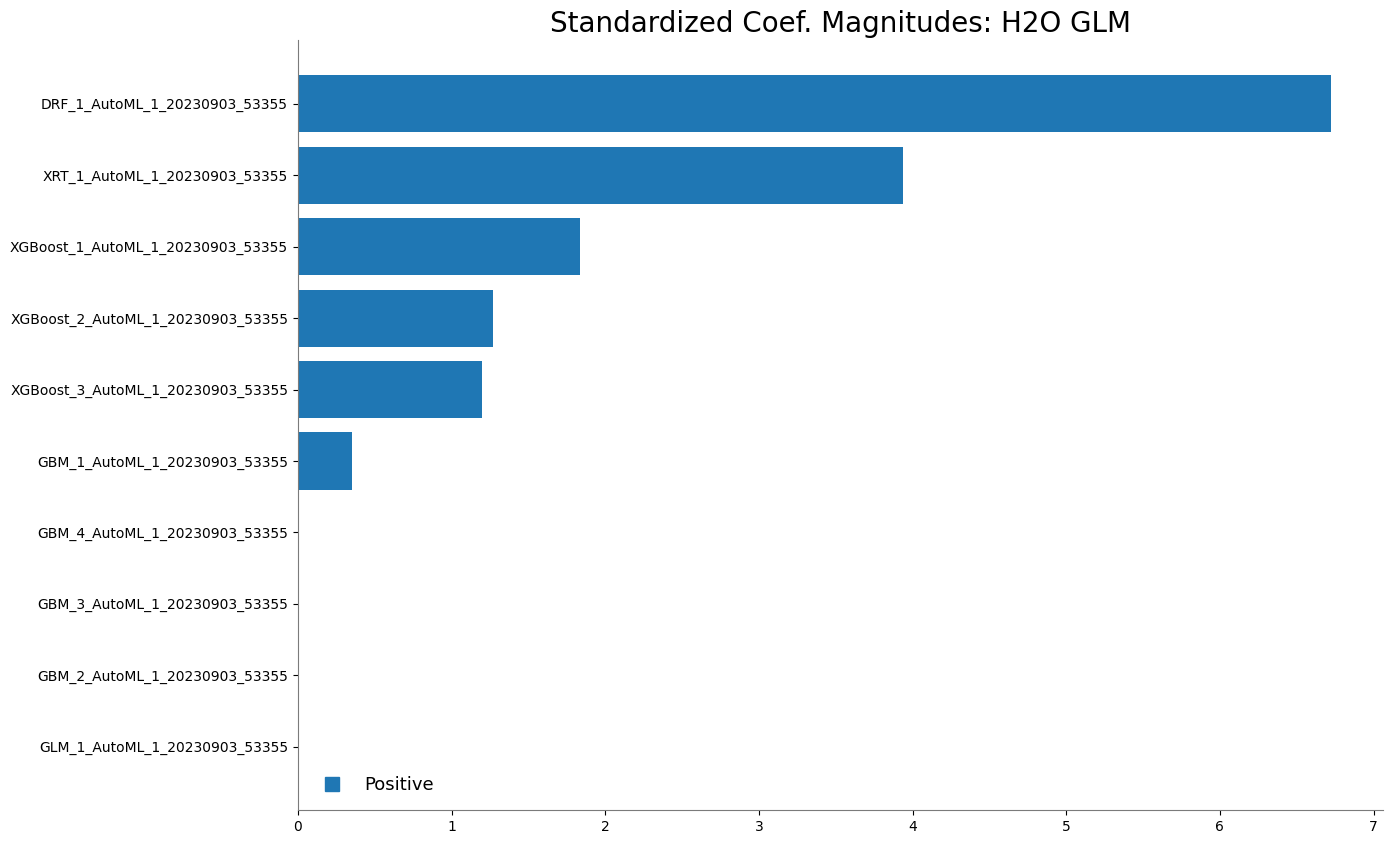

In [17]:
%matplotlib inline
metalearner.std_coef_plot()

# Метрики лидера

## Сохранение модели

In [18]:
# Сохранение лучшей модели
#h2o.save_model(aml.leader, path = "./")

In [19]:
# загружаю модель для дальнейшей работы с ней
#import sys, os, os.path
#aml_leader = h2o.load_model("/home/jupyter/StackedEnsemble_AllModels_2_AutoML_2_20230902_164131")
#aml_leader
aml_leader = h2o.get_model(model_ids[0])
aml_leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## Метрики на тренировочном и валдиационном

In [20]:
import pandas as pd

# прогноз лидирующей моделю на валидационной выборке
val_pred=aml_leader.predict(valid)

# прогнозный датасеат сконвертиую его в пандас датафрейм
val_pred = val_pred.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [21]:
# из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
val_test = valid['Stay'].as_data_frame()

In [22]:
# оценка с с помощью валиадционного датасета
import numpy as np
mae = np.mean(abs(val_pred['predict']-val_test['Stay']))
rmse = np.sqrt(np.mean((val_pred['predict']-val_test['Stay'])**2))
rae = np.mean(abs(val_pred['predict']-val_test['Stay']))/np.mean(abs(val_test['Stay']-np.mean(val_test['Stay'])))
rse = np.mean((val_pred['predict']-val_test['Stay'])**2)/np.mean((val_test['Stay']-np.mean(val_test['Stay']))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

Mean Absolute Error: 8.881662
Root Mean Squared Error: 12.229654
Relative Absolute Error: 0.551704
Relative Squared Error: 0.326428


In [23]:
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.2f}% \n".format(100*r2_score(val_test, val_pred)))

The R-squared value is: 67.36% 



## Метрики на тренировочном и unseen

In [24]:
# прогноз лидирующей моделю на валидационной выборке
val_pred=aml_leader.predict(unseen)

# прогнозный датасеат сконвертиую его в пандас датафрейм
val_pred = val_pred.as_data_frame()

# из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
val_test = unseen['Stay'].as_data_frame()

# оценка с с помощью валиадционного датасета
mae = np.mean(abs(val_pred['predict']-val_test['Stay']))
rmse = np.sqrt(np.mean((val_pred['predict']-val_test['Stay'])**2))
rae = np.mean(abs(val_pred['predict']-val_test['Stay']))/np.mean(abs(val_test['Stay']-np.mean(val_test['Stay'])))
rse = np.mean((val_pred['predict']-val_test['Stay'])**2)/np.mean((val_test['Stay']-np.mean(val_test['Stay']))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Mean Absolute Error: 8.945052
Root Mean Squared Error: 12.335691
Relative Absolute Error: 0.555086
Relative Squared Error: 0.331702


In [25]:
print("The R-squared value is: {0:0.2f}% \n".format(100*r2_score(val_test, val_pred)))

The R-squared value is: 66.83% 



# Графики кривых обучения лидеров

In [26]:
#learning_curve_plot = aml_leader.learning_curve_plot()

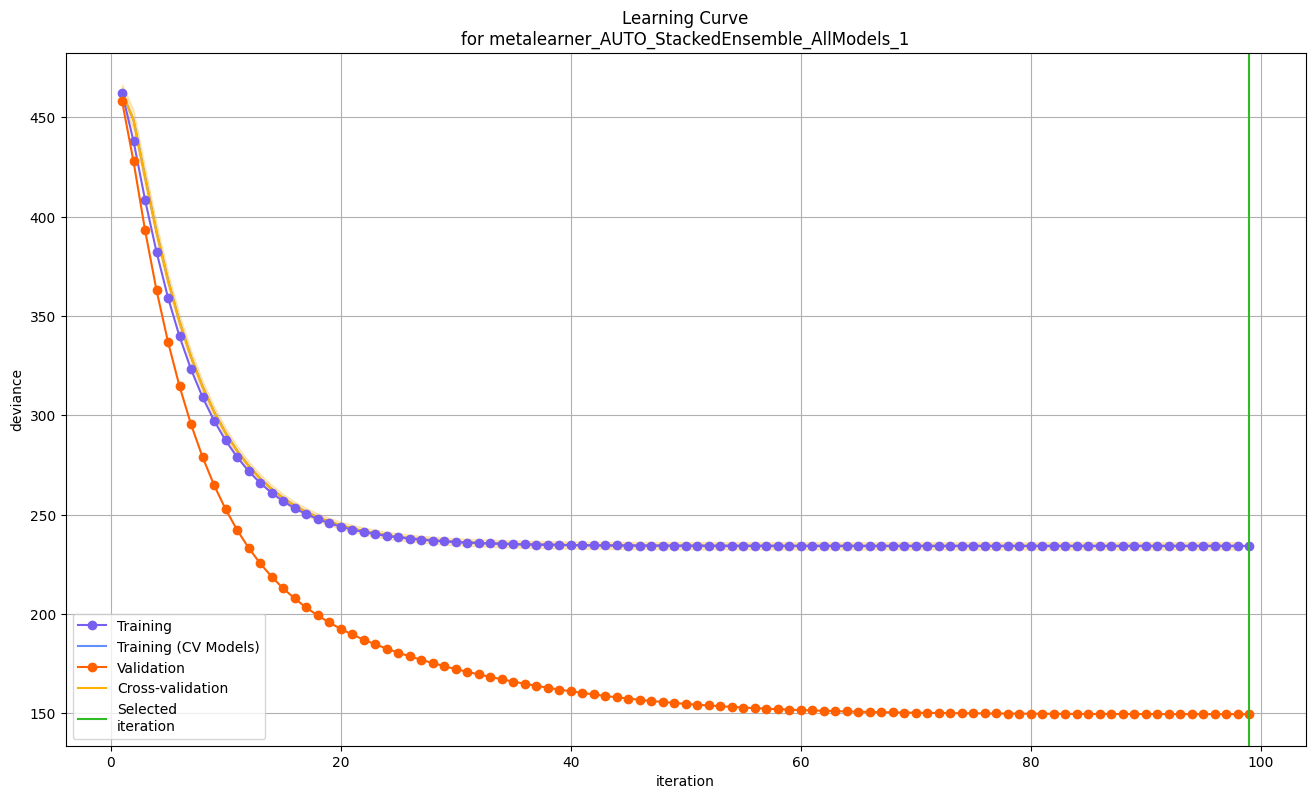

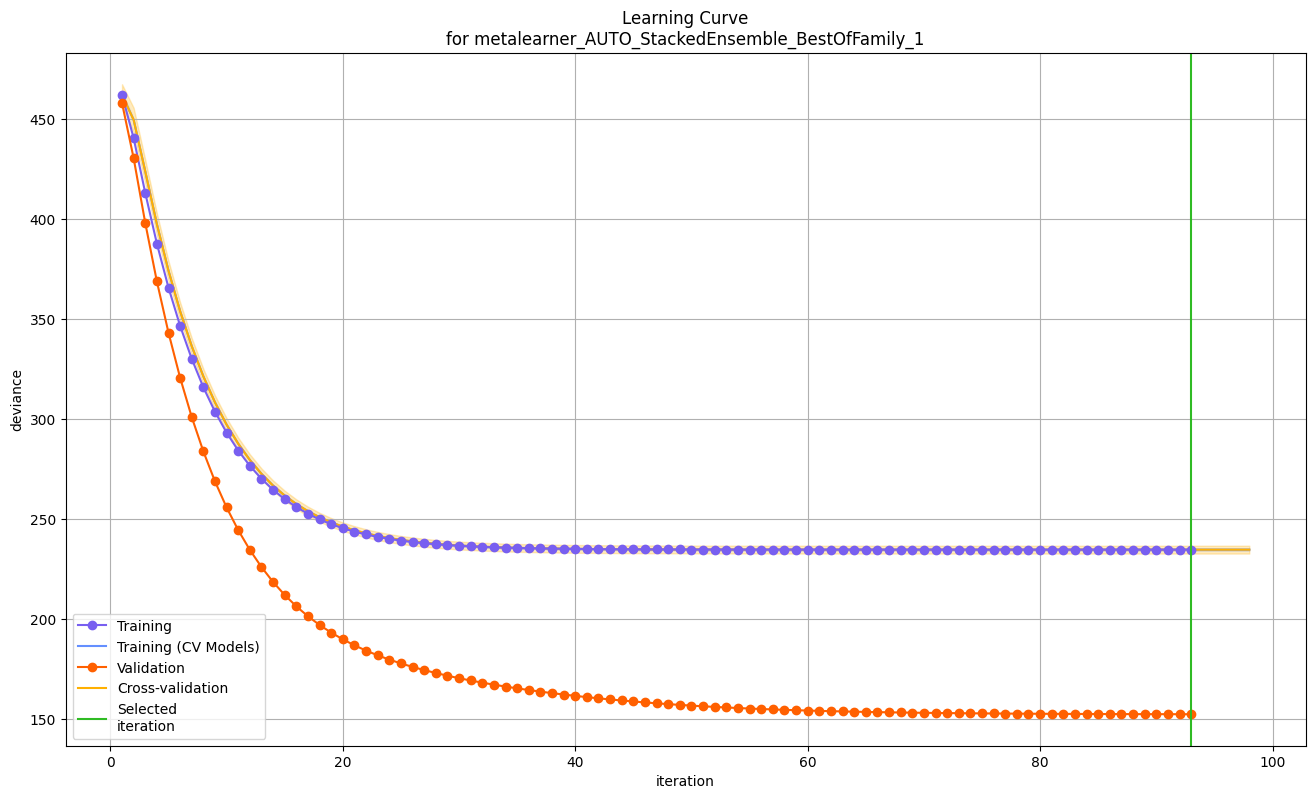

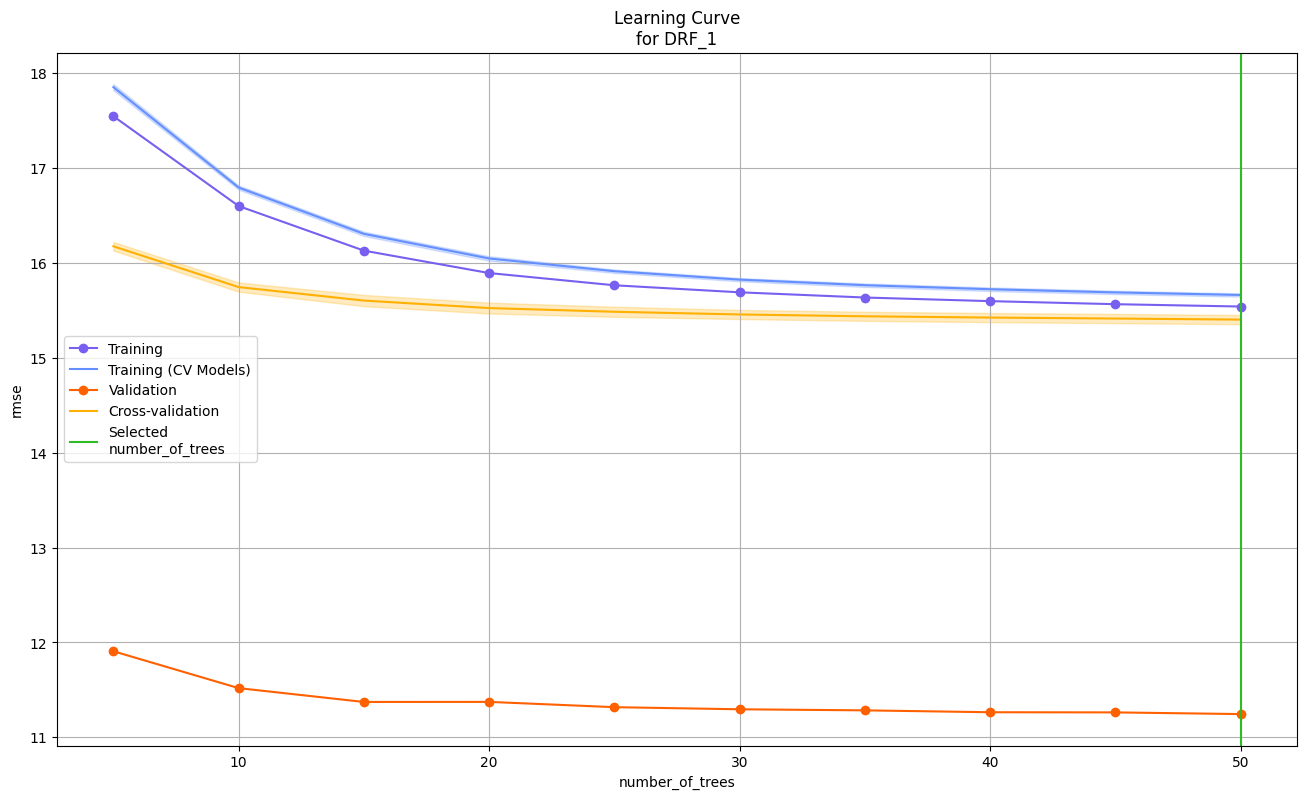

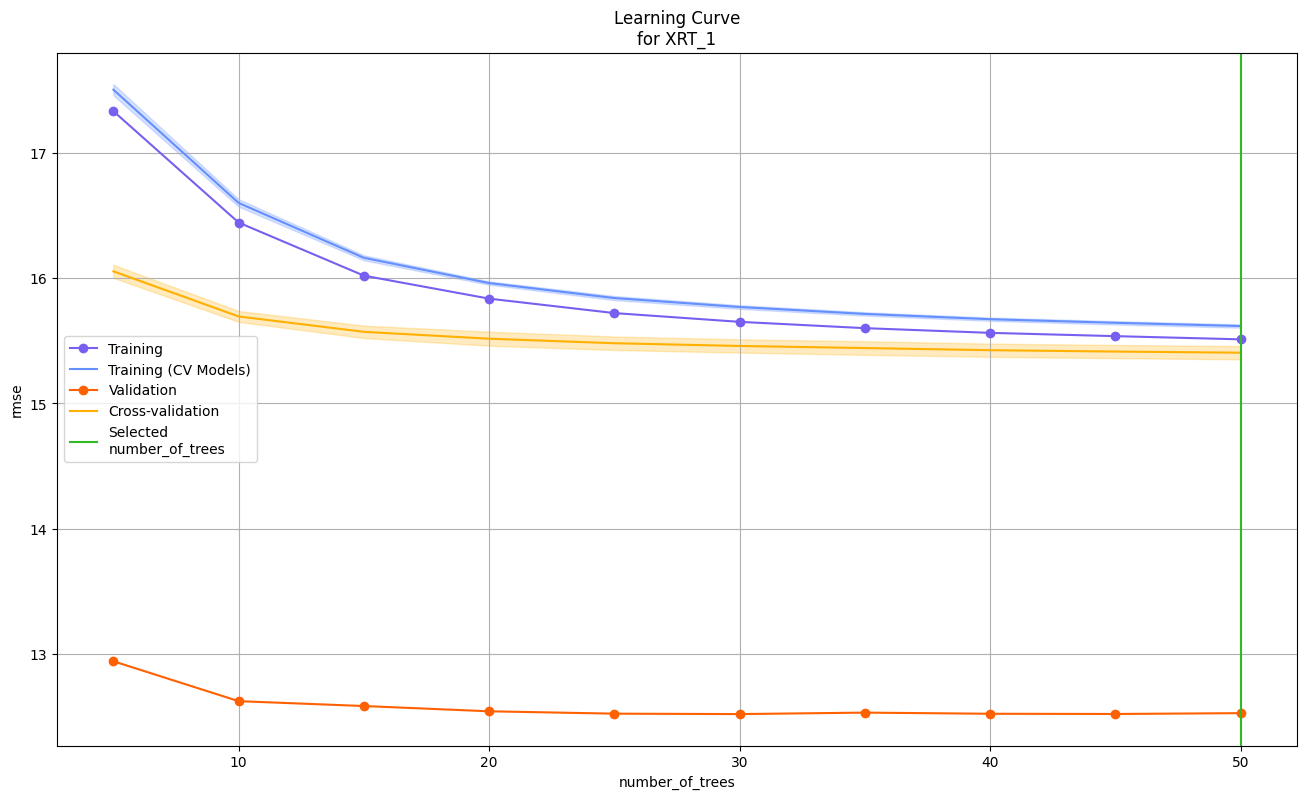

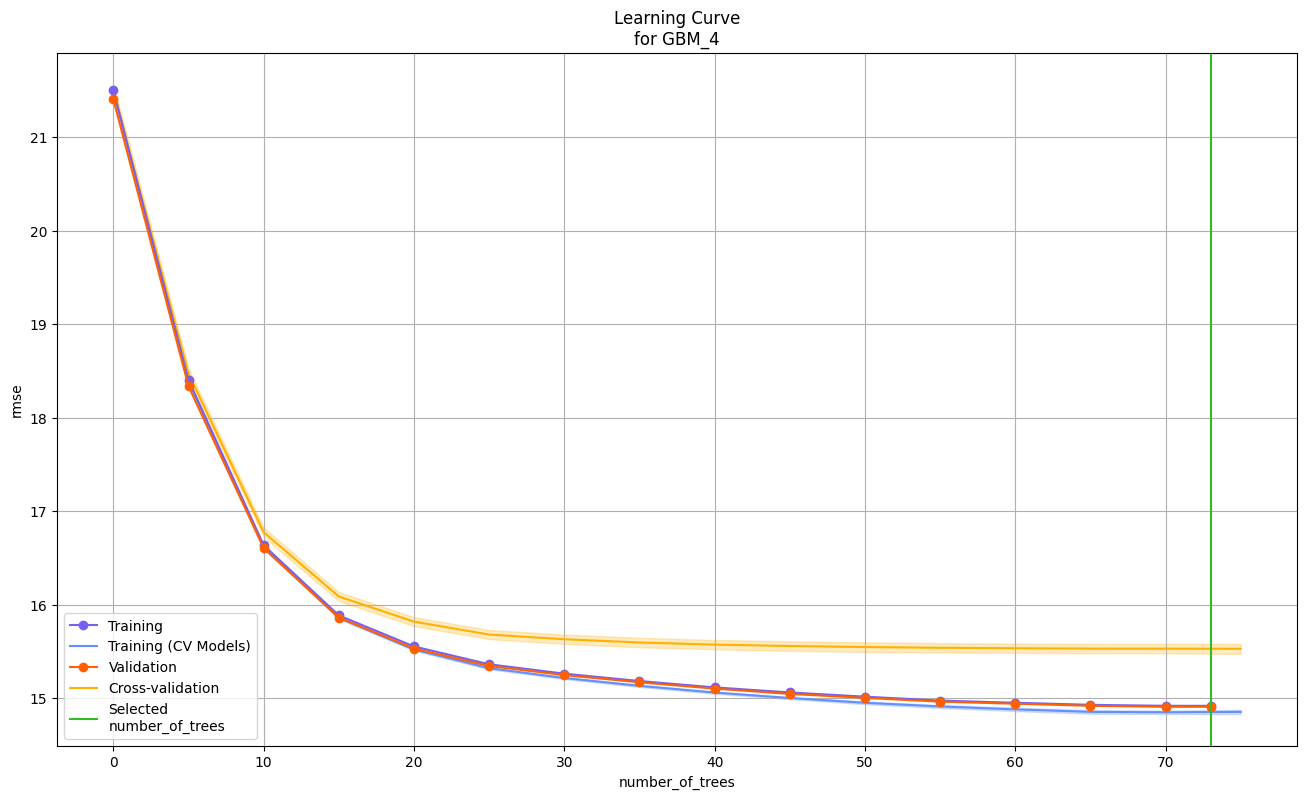

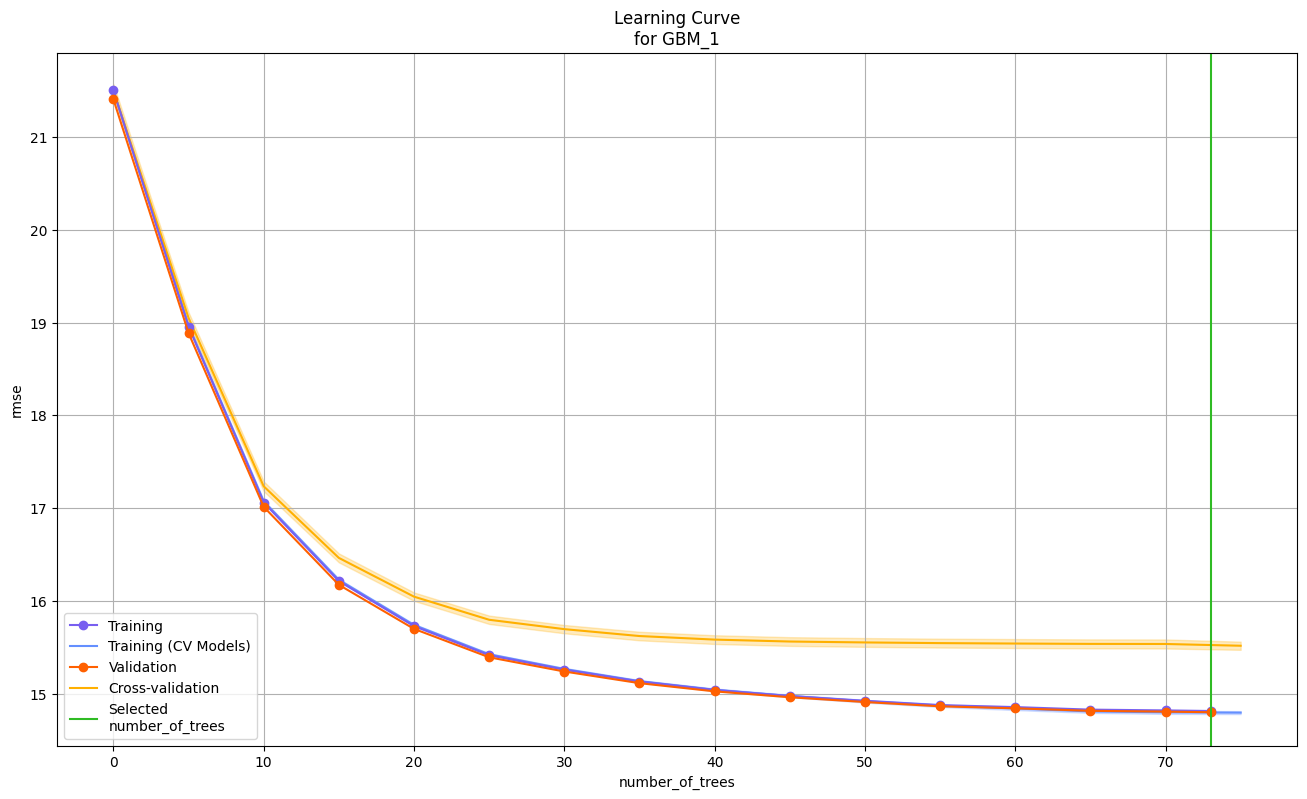

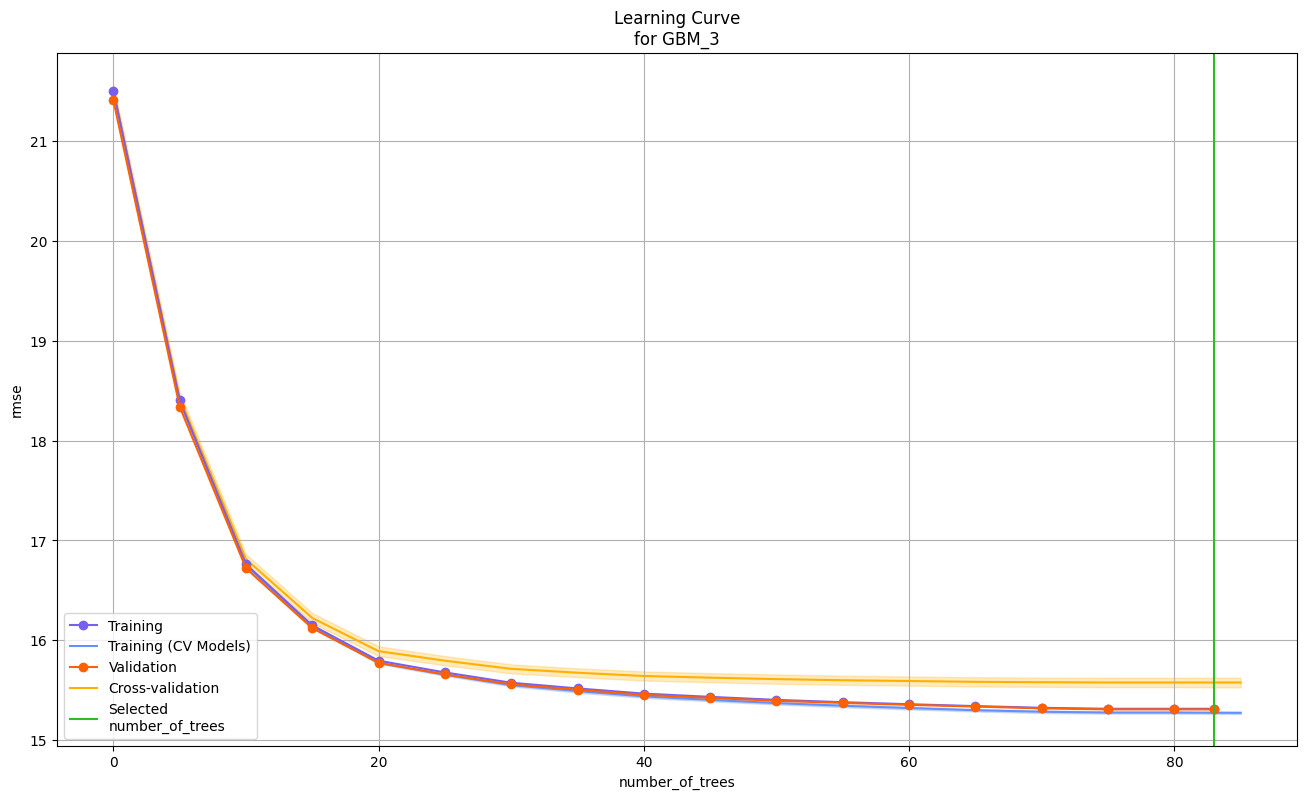

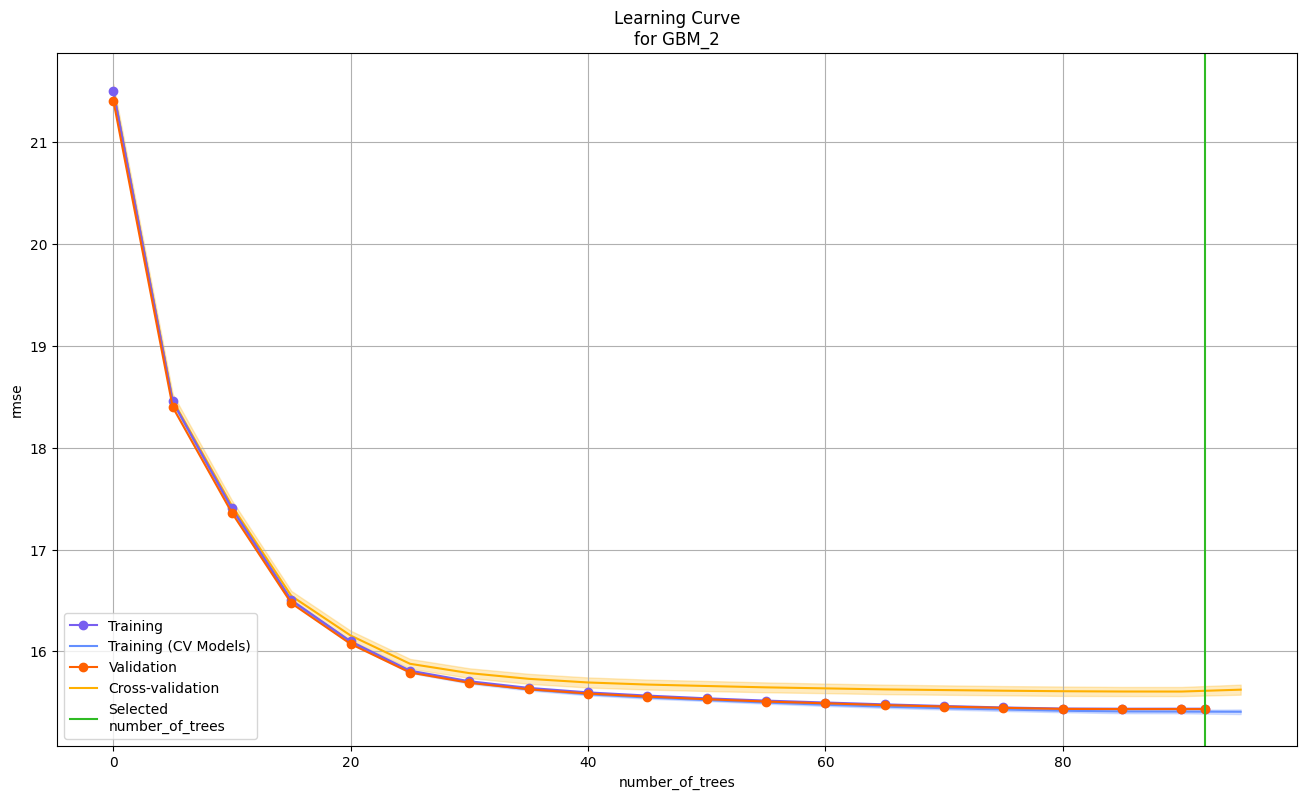

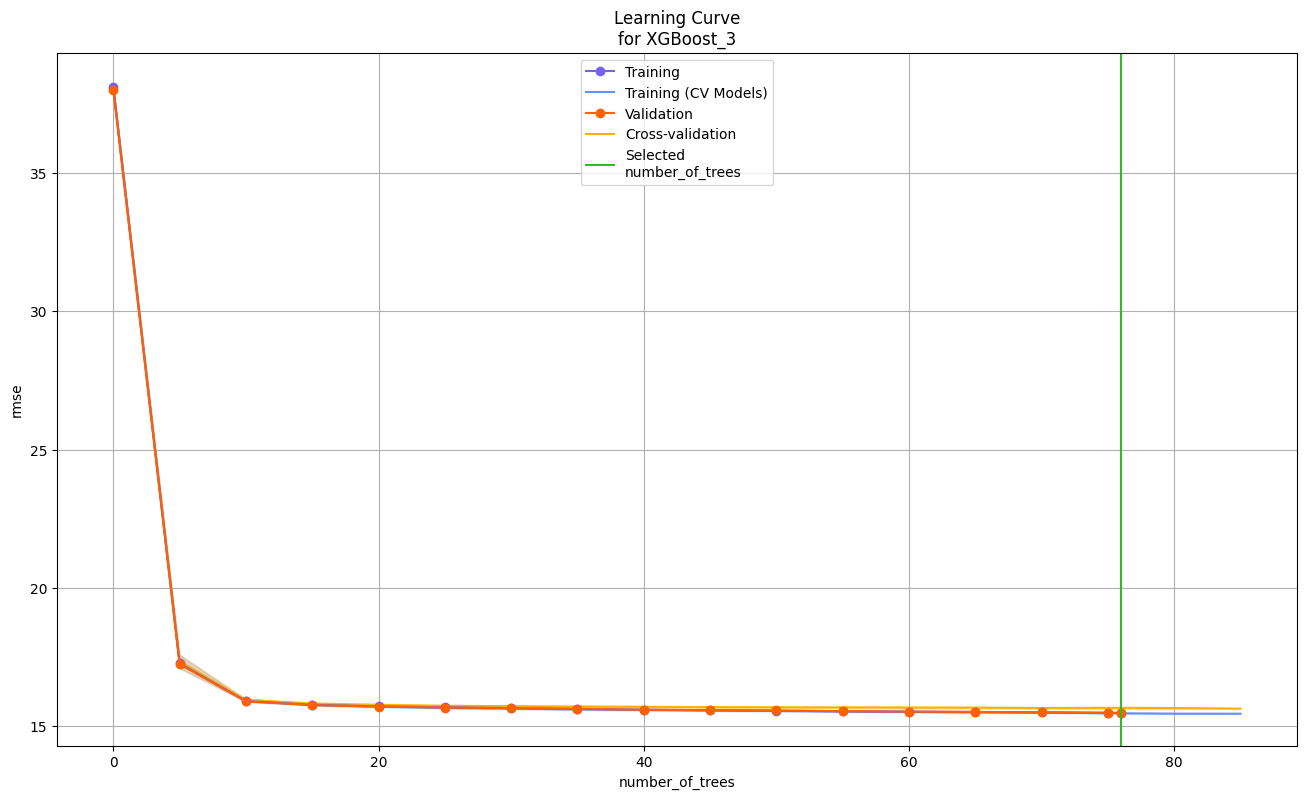

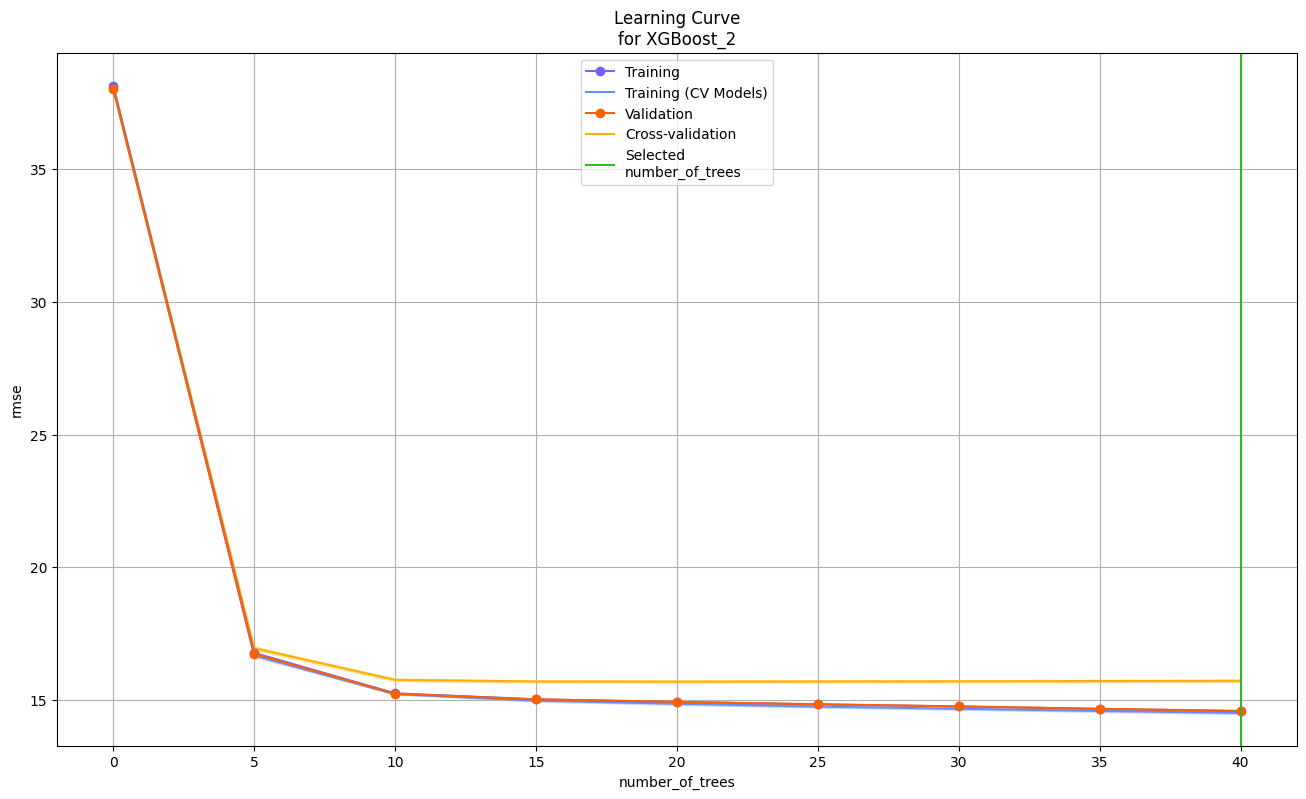

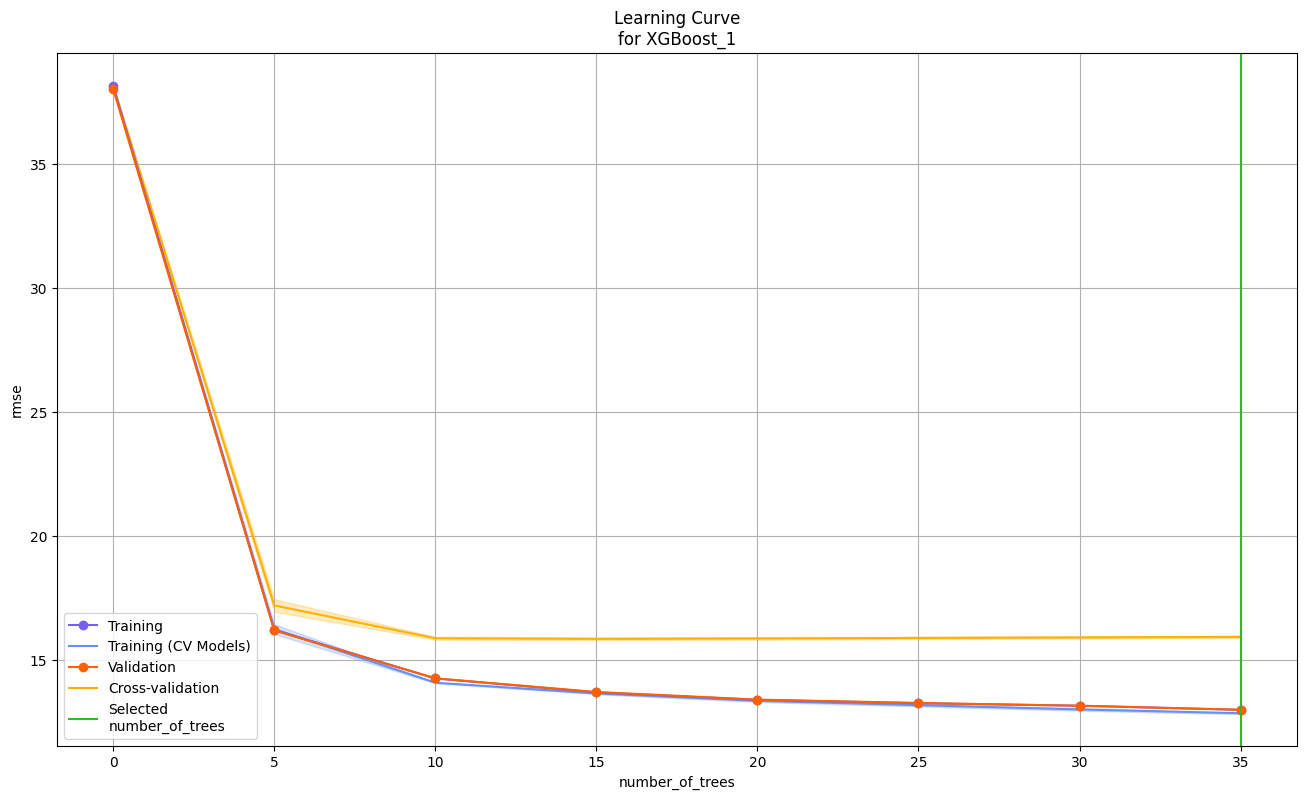

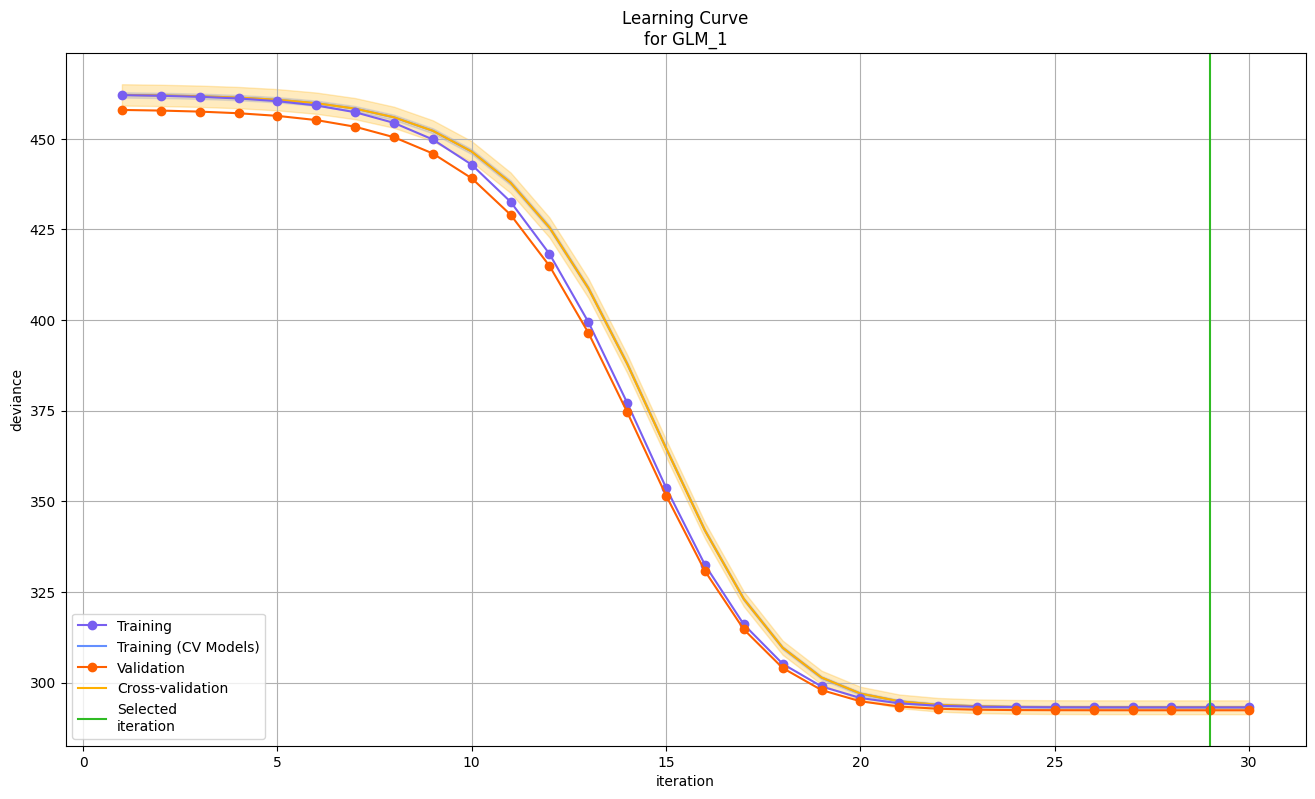

In [27]:
for model_id in model_ids:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()

# Метрики второго

## Загрузка

In [28]:
aml_leader_2 = h2o.get_model(model_ids[0])
aml_leader_2

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


## Метрики

In [29]:
                                                                                                                                                                                                                                                                                                                                                                                              import pandas as pd

# прогноз лидирующей моделю на валидационной выборке
val_pred=aml_leader_2.predict(valid)

# прогнозный датасеат сконвертиую его в пандас датафрейм
val_pred = val_pred.as_data_frame()



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
